In [2]:
import praw
import os
import re
import pandas as pd
from dotenv import load_dotenv
from textblob import TextBlob
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")
user_agent = os.getenv("USER_AGENT")
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

print("Authenticated with Reddit API successfully!")
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  
    text = text.lower()  
    return text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  
subreddit = reddit.subreddit("stocks")
posts = []
for post in subreddit.top(limit=100):
    post_data = {
        'title': post.title,
        'score': post.score,
        'url': post.url,
        'content': post.selftext,
        'title_sentiment': get_sentiment(post.title),
        'content_sentiment': get_sentiment(post.selftext),
    }
    post_data['title'] = clean_text(post_data['title'])
    post_data['content'] = clean_text(post_data['content'])
    posts.append(post_data)
df = pd.DataFrame(posts)
df.to_csv('stocks_posts.csv', index=False)
print("Data has been saved to 'stocks_posts.csv' successfully!")

Authenticated with Reddit API successfully!
Data has been saved to 'stocks_posts.csv' successfully!


In [3]:
import pandas as pd
df = pd.read_csv('stocks_posts.csv')
print(df.head())  

                                               title   score  \
0  its fucking awful seeing the silver misinforma...  102340   
1  companies try to prevent people from trading g...   88964   
2                    today is a dark day for traders   45646   
3  breaking dow falls 240 points as trump calls o...   44002   
4  gme dedicated thread  breaking cnbc engages in...   42057   

                                                 url  \
0  https://www.reddit.com/r/stocks/comments/la34b...   
1  https://www.reddit.com/r/stocks/comments/l6uva...   
2  https://www.reddit.com/r/stocks/comments/l7awn...   
3  https://www.reddit.com/r/stocks/comments/j6b8k...   
4  https://www.reddit.com/r/stocks/comments/l64xv...   

                                             content  title_sentiment  \
0   dont buy silver its a trap\n\ntheyre talking ...            -1.00   
1  not sure about the other trading apps but trad...             0.00   
2  it does not matter if you invested in gme made...       

In [4]:
import pandas as pd
df = pd.read_csv('stocks_posts.csv')  
print(df.head())
print(df.info())

                                               title   score  \
0  its fucking awful seeing the silver misinforma...  102340   
1  companies try to prevent people from trading g...   88964   
2                    today is a dark day for traders   45646   
3  breaking dow falls 240 points as trump calls o...   44002   
4  gme dedicated thread  breaking cnbc engages in...   42057   

                                                 url  \
0  https://www.reddit.com/r/stocks/comments/la34b...   
1  https://www.reddit.com/r/stocks/comments/l6uva...   
2  https://www.reddit.com/r/stocks/comments/l7awn...   
3  https://www.reddit.com/r/stocks/comments/j6b8k...   
4  https://www.reddit.com/r/stocks/comments/l64xv...   

                                             content  title_sentiment  \
0   dont buy silver its a trap\n\ntheyre talking ...            -1.00   
1  not sure about the other trading apps but trad...             0.00   
2  it does not matter if you invested in gme made...       

In [5]:
for post in subreddit.top(limit=100):
    try:
        post_data = {
            'title': clean_text(post.title),
            'score': post.score,
            'url': post.url,
            'content': clean_text(post.selftext if post.selftext else ''),
            'title_sentiment': get_sentiment(post.title),
            'content_sentiment': get_sentiment(post.selftext if post.selftext else ''),
            'created_date': pd.to_datetime(post.created_utc, unit='s'),
            'num_comments': post.num_comments,
            'upvote_ratio': post.upvote_ratio,
        }
        posts.append(post_data)
    except Exception as e:
        print(f"Error processing post: {e}")

In [6]:
print(f"Authenticated: {reddit.read_only}") 

Authenticated: True


In [7]:
subreddit = reddit.subreddit("stocks")
for post in subreddit.top(limit=5):
    print(post.title)

It's fucking awful seeing the "Silver" misinformation campaign everywhere I look
Companies try to prevent people from trading GME and AMC
Today is a dark day for traders
BREAKING: Dow falls 240 points as Trump calls off coronavirus stimulus talks until after election
GME Dedicated Thread - Breaking: CNBC engages in market manipulation - lies about Melvin Capital having already covered positions


In [8]:
posts = []
for post in subreddit.top(limit=100):
    try:
        post_data = {
            'title': clean_text(post.title),
            'score': post.score,
            'url': post.url,
            'content': clean_text(post.selftext if post.selftext else ''),
            'title_sentiment': get_sentiment(post.title),
            'content_sentiment': get_sentiment(post.selftext if post.selftext else ''),
            'created_date': pd.to_datetime(post.created_utc, unit='s'),
            'num_comments': post.num_comments,
            'upvote_ratio': post.upvote_ratio,
        }
        posts.append(post_data)
        print(f"Processed post: {post.title[:30]}...")  
    except Exception as e:
        print(f"Error processing post: {e}")

Processed post: It's fucking awful seeing the ...
Processed post: Companies try to prevent peopl...
Processed post: Today is a dark day for trader...
Processed post: BREAKING: Dow falls 240 points...
Processed post: GME Dedicated Thread - Breakin...
Processed post: Weekend GME Thread + Homework ...
Processed post: Why hasn't Robinhood still not...
Processed post: Robinhood, which previously so...
Processed post: Is anyone else feeling really ...
Processed post: What $GME has taught me in 36 ...
Processed post: Why is the media still reporti...
Processed post: Biden to require electric vehi...
Processed post: Pelosi rejects stock-trading b...
Processed post: Reddit has become super annoyi...
Processed post: GME short squeeze what comes n...
Processed post: Unknown Stock Market Investor ...
Processed post: Gamestop short interest just u...
Processed post: GME end financial culture: how...
Processed post: Melvin Capital, hedge fund tor...
Processed post: Biden to announce Stimulus in ...


In [9]:
if not posts:
    print("No posts were processed.")
else:
    print(f"Processed {len(posts)} posts.")
    df = pd.DataFrame(posts)
    df.to_csv('stocks_posts.csv', index=False)
    print("Data has been saved to 'stocks_posts.csv' successfully!")

Processed 100 posts.
Data has been saved to 'stocks_posts.csv' successfully!


In [10]:
import pandas as pd
df = pd.read_csv('stocks_posts.csv')

In [11]:
df

,title,score,url,content,title_sentiment,content_sentiment,created_date,num_comments,upvote_ratio
0,its fucking awful seeing the silver misinforma...,102350,https://www.reddit.com/r/stocks/comments/la34b...,dont buy silver its a trap\n\ntheyre talking ...,-1.000,-0.076926,2021-02-01 13:32:40,4339,0.90
1,companies try to prevent people from trading g...,88955,https://www.reddit.com/r/stocks/comments/l6uva...,not sure about the other trading apps but trad...,0.000,-0.005376,2021-01-28 11:55:18,6706,0.94
2,today is a dark day for traders,45654,https://www.reddit.com/r/stocks/comments/l7awn...,it does not matter if you invested in gme made...,-0.150,0.044444,2021-01-28 22:27:41,2560,0.94
3,breaking dow falls 240 points as trump calls o...,44008,https://www.reddit.com/r/stocks/comments/j6b8k...,\n\nvery stable genius good for the market sma...,0.000,0.371429,2020-10-06 19:03:29,4412,0.89
4,gme dedicated thread breaking cnbc engages in...,42053,https://www.reddit.com/r/stocks/comments/l64xv...,hello all\n\nwe are opening this thread so it ...,0.000,0.087338,2021-01-27 13:54:01,4824,0.92
...,...,...,...,...,...,...,...,...,...
95,tired of hearing about gme amc nok i handpick...,6833,https://www.reddit.com/r/stocks/comments/lfbw0...,hello\n\ni went through all the hot posts in p...,0.175,0.257080,2021-02-08 13:34:55,752,0.92
96,gasoline prices top 5 a gallon nationally for ...,6817,https://www.reddit.com/r/stocks/comments/v9wqo...,the average price for a gallon of unleaded gas...,0.250,0.049888,2022-06-11 12:39:17,2151,0.92
97,biden administration is moving ahead with a ba...,6794,https://www.reddit.com/r/stocks/comments/t8t9e...,washington march 7 reuters the biden administ...,0.000,-0.001587,2022-03-07 16:37:46,762,0.96
98,why i fail to see how the metaverse will succeed,6725,https://www.reddit.com/r/stocks/comments/s62x5...,ive read that a lot of people here are super b...,-0.500,0.046378,2022-01-17 12:28:53,2466,0.88


In [12]:
print(df.isnull().sum())

title                0
score                0
url                  0
content              3
title_sentiment      0
content_sentiment    0
created_date         0
num_comments         0
upvote_ratio         0
dtype: int64


In [13]:
df=df.dropna()

In [14]:
print(df.isnull().sum())

title                0
score                0
url                  0
content              0
title_sentiment      0
content_sentiment    0
created_date         0
num_comments         0
upvote_ratio         0
dtype: int64


In [15]:
print(f"number of duplicates:{df.duplicated().sum()}")

number of duplicates:0


In [16]:
df.describe()

,score,title_sentiment,content_sentiment,num_comments,upvote_ratio
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,14503.298969,0.084319,0.088293,1644.865979,0.914330
std,14450.041112,0.266928,0.112811,1202.484768,0.048303
min,6705.000000,-1.000000,-0.320000,56.000000,0.710000
25%,7523.000000,0.000000,0.023541,843.000000,0.890000
50%,9726.000000,0.000000,0.083444,1210.000000,0.920000
75%,14653.000000,0.166667,0.143225,2228.000000,0.950000
max,102350.000000,1.000000,0.420833,6706.000000,0.990000


In [17]:
df['title_sentiment'].unique()

array([-1.        ,  0.        , -0.15      ,  0.1       ,  0.45      ,
       -0.16666667, -0.1       ,  0.03888889, -0.15555556,  0.075     ,
        0.22727273,  0.75      , -0.375     ,  0.4       ,  0.05      ,
        0.2       ,  0.05      ,  0.125     , -0.13181818, -0.3       ,
        0.10416667,  0.31818182,  0.43333333,  1.        ,  0.14732143,
        0.33333333,  0.23541667,  0.6       ,  0.5       ,  0.16666667,
        0.16818182,  0.14818182,  0.28571429,  0.12833333, -0.125     ,
       -0.0625    ,  0.35714286, -0.03333333, -0.05      ,  0.175     ,
        0.25      , -0.5       ])

In [18]:
df['content_sentiment'].unique()

array([-0.07692577, -0.00537587,  0.04444444,  0.37142857,  0.08733766,
       -0.00486642,  0.01461039,  0.14905303,  0.06984353, -0.00714286,
        0.2125    ,  0.23981481,  0.13257576,  0.10878348,  0.08105159,
        0.12389456,  0.06684343,  0.10833333,  0.07291357,  0.12042161,
       -0.00740741,  0.09744574,  0.05065789,  0.13132576,  0.22550052,
       -0.06525974,  0.22972583,  0.07466931,  0.10277778,  0.06319697,
        0.14833475,  0.046875  ,  0.20944444,  0.1       ,  0.11060606,
        0.01439394,  0.03710363, -0.06076923, -0.10716374, -0.0425    ,
        0.        ,  0.3       ,  0.10321068,  0.00647059,  0.02354141,
        0.045     ,  0.12886003,  0.02888889,  0.1748567 ,  0.16909091,
        0.35      ,  0.1432249 ,  0.07659006,  0.090625  , -0.09967949,
       -0.01668921,  0.26111111,  0.22916667,  0.13333333,  0.05      ,
        0.10159439,  0.26      ,  0.17724832,  0.09598255,  0.08840123,
        0.04501418,  0.03293651,  0.01111111, -0.04861111,  0.08

In [19]:
print(df.dtypes)

title                 object
score                  int64
url                   object
content               object
title_sentiment      float64
content_sentiment    float64
created_date          object
num_comments           int64
upvote_ratio         float64
dtype: object


In [20]:
df

,title,score,url,content,title_sentiment,content_sentiment,created_date,num_comments,upvote_ratio
0,its fucking awful seeing the silver misinforma...,102350,https://www.reddit.com/r/stocks/comments/la34b...,dont buy silver its a trap\n\ntheyre talking ...,-1.000,-0.076926,2021-02-01 13:32:40,4339,0.90
1,companies try to prevent people from trading g...,88955,https://www.reddit.com/r/stocks/comments/l6uva...,not sure about the other trading apps but trad...,0.000,-0.005376,2021-01-28 11:55:18,6706,0.94
2,today is a dark day for traders,45654,https://www.reddit.com/r/stocks/comments/l7awn...,it does not matter if you invested in gme made...,-0.150,0.044444,2021-01-28 22:27:41,2560,0.94
3,breaking dow falls 240 points as trump calls o...,44008,https://www.reddit.com/r/stocks/comments/j6b8k...,\n\nvery stable genius good for the market sma...,0.000,0.371429,2020-10-06 19:03:29,4412,0.89
4,gme dedicated thread breaking cnbc engages in...,42053,https://www.reddit.com/r/stocks/comments/l64xv...,hello all\n\nwe are opening this thread so it ...,0.000,0.087338,2021-01-27 13:54:01,4824,0.92
...,...,...,...,...,...,...,...,...,...
95,tired of hearing about gme amc nok i handpick...,6833,https://www.reddit.com/r/stocks/comments/lfbw0...,hello\n\ni went through all the hot posts in p...,0.175,0.257080,2021-02-08 13:34:55,752,0.92
96,gasoline prices top 5 a gallon nationally for ...,6817,https://www.reddit.com/r/stocks/comments/v9wqo...,the average price for a gallon of unleaded gas...,0.250,0.049888,2022-06-11 12:39:17,2151,0.92
97,biden administration is moving ahead with a ba...,6794,https://www.reddit.com/r/stocks/comments/t8t9e...,washington march 7 reuters the biden administ...,0.000,-0.001587,2022-03-07 16:37:46,762,0.96
98,why i fail to see how the metaverse will succeed,6725,https://www.reddit.com/r/stocks/comments/s62x5...,ive read that a lot of people here are super b...,-0.500,0.046378,2022-01-17 12:28:53,2466,0.88


In [21]:
df['title_sentiment']=df['title_sentiment'].fillna(0)

C:\Users\fathi\AppData\Local\Temp\ipykernel_4448\2829558595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_sentiment']=df['title_sentiment'].fillna(0)


In [22]:
df['content_sentiment']=df['content_sentiment'].fillna(0)

C:\Users\fathi\AppData\Local\Temp\ipykernel_4448\2948137639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_sentiment']=df['content_sentiment'].fillna(0)


In [23]:
df.to_csv('stocks_posts_cleaned.csv', index=False)
print("Cleaned data saved to 'stocks_posts_cleaned.csv'.")

Cleaned data saved to 'stocks_posts_cleaned.csv'.


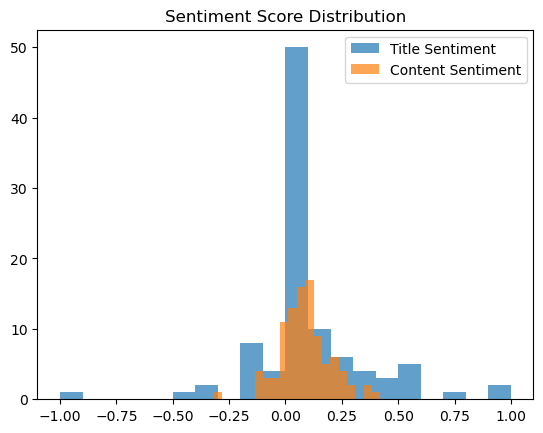

In [24]:
import matplotlib.pyplot as plt
plt.hist(df['title_sentiment'], bins=20, alpha=0.7, label='Title Sentiment')
plt.hist(df['content_sentiment'], bins=20, alpha=0.7, label='Content Sentiment')
plt.legend()
plt.title('Sentiment Score Distribution')
plt.show()

In [25]:
conda install yfinance

Channels:
Note: you may need to restart the kernel to use updated packages.

 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [26]:
import yfinance as yf
stock_data = yf.download("AAPL", start="2021-01-01", end="2023-12-31")
stock_data = stock_data[['Close']]
stock_data.reset_index(inplace=True)
stock_data.columns = ['date', 'close_price']
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

        date  close_price
0 2021-01-04   129.410004
1 2021-01-05   131.009995
2 2021-01-06   126.599998
3 2021-01-07   130.919998
4 2021-01-08   132.050003


In [27]:
print(df.columns)

Index(['title', 'score', 'url', 'content', 'title_sentiment',
       'content_sentiment', 'created_date', 'num_comments', 'upvote_ratio'],
      dtype='object')


In [28]:
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

C:\Users\fathi\AppData\Local\Temp\ipykernel_4448\3718354678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')


In [29]:
df.rename(columns={'created_date': 'date'}, inplace=True)

C:\Users\fathi\AppData\Local\Temp\ipykernel_4448\3405332540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'created_date': 'date'}, inplace=True)


In [30]:
print(df.columns)

Index(['title', 'score', 'url', 'content', 'title_sentiment',
       'content_sentiment', 'date', 'num_comments', 'upvote_ratio'],
      dtype='object')


In [31]:
df

,title,score,url,content,title_sentiment,content_sentiment,date,num_comments,upvote_ratio
0,its fucking awful seeing the silver misinforma...,102350,https://www.reddit.com/r/stocks/comments/la34b...,dont buy silver its a trap\n\ntheyre talking ...,-1.000,-0.076926,2021-02-01 13:32:40,4339,0.90
1,companies try to prevent people from trading g...,88955,https://www.reddit.com/r/stocks/comments/l6uva...,not sure about the other trading apps but trad...,0.000,-0.005376,2021-01-28 11:55:18,6706,0.94
2,today is a dark day for traders,45654,https://www.reddit.com/r/stocks/comments/l7awn...,it does not matter if you invested in gme made...,-0.150,0.044444,2021-01-28 22:27:41,2560,0.94
3,breaking dow falls 240 points as trump calls o...,44008,https://www.reddit.com/r/stocks/comments/j6b8k...,\n\nvery stable genius good for the market sma...,0.000,0.371429,2020-10-06 19:03:29,4412,0.89
4,gme dedicated thread breaking cnbc engages in...,42053,https://www.reddit.com/r/stocks/comments/l64xv...,hello all\n\nwe are opening this thread so it ...,0.000,0.087338,2021-01-27 13:54:01,4824,0.92
...,...,...,...,...,...,...,...,...,...
95,tired of hearing about gme amc nok i handpick...,6833,https://www.reddit.com/r/stocks/comments/lfbw0...,hello\n\ni went through all the hot posts in p...,0.175,0.257080,2021-02-08 13:34:55,752,0.92
96,gasoline prices top 5 a gallon nationally for ...,6817,https://www.reddit.com/r/stocks/comments/v9wqo...,the average price for a gallon of unleaded gas...,0.250,0.049888,2022-06-11 12:39:17,2151,0.92
97,biden administration is moving ahead with a ba...,6794,https://www.reddit.com/r/stocks/comments/t8t9e...,washington march 7 reuters the biden administ...,0.000,-0.001587,2022-03-07 16:37:46,762,0.96
98,why i fail to see how the metaverse will succeed,6725,https://www.reddit.com/r/stocks/comments/s62x5...,ive read that a lot of people here are super b...,-0.500,0.046378,2022-01-17 12:28:53,2466,0.88


In [32]:
print("Columns in df:", df.columns)
print("Columns in stock_data:", stock_data.columns)

Columns in df: Index(['title', 'score', 'url', 'content', 'title_sentiment',
       'content_sentiment', 'date', 'num_comments', 'upvote_ratio'],
      dtype='object')
Columns in stock_data: Index(['date', 'close_price'], dtype='object')


In [33]:
post_data['created_date'] = post.created_utc

In [34]:
print(df.head())
print(stock_data.head())

                                               title   score  \
0  its fucking awful seeing the silver misinforma...  102350   
1  companies try to prevent people from trading g...   88955   
2                    today is a dark day for traders   45654   
3  breaking dow falls 240 points as trump calls o...   44008   
4  gme dedicated thread  breaking cnbc engages in...   42053   

                                                 url  \
0  https://www.reddit.com/r/stocks/comments/la34b...   
1  https://www.reddit.com/r/stocks/comments/l6uva...   
2  https://www.reddit.com/r/stocks/comments/l7awn...   
3  https://www.reddit.com/r/stocks/comments/j6b8k...   
4  https://www.reddit.com/r/stocks/comments/l64xv...   

                                             content  title_sentiment  \
0   dont buy silver its a trap\n\ntheyre talking ...            -1.00   
1  not sure about the other trading apps but trad...             0.00   
2  it does not matter if you invested in gme made...       

In [35]:
print(stock_data.columns)
print(stock_data.index)

Index(['date', 'close_price'], dtype='object')
RangeIndex(start=0, stop=753, step=1)


In [36]:
print(stock_data.columns)

Index(['date', 'close_price'], dtype='object')


In [37]:
stock_data['date'] = pd.to_datetime(stock_data['date']).dt.date

In [38]:
print(df.columns)

Index(['title', 'score', 'url', 'content', 'title_sentiment',
       'content_sentiment', 'date', 'num_comments', 'upvote_ratio'],
      dtype='object')


In [39]:
df

,title,score,url,content,title_sentiment,content_sentiment,date,num_comments,upvote_ratio
0,its fucking awful seeing the silver misinforma...,102350,https://www.reddit.com/r/stocks/comments/la34b...,dont buy silver its a trap\n\ntheyre talking ...,-1.000,-0.076926,2021-02-01 13:32:40,4339,0.90
1,companies try to prevent people from trading g...,88955,https://www.reddit.com/r/stocks/comments/l6uva...,not sure about the other trading apps but trad...,0.000,-0.005376,2021-01-28 11:55:18,6706,0.94
2,today is a dark day for traders,45654,https://www.reddit.com/r/stocks/comments/l7awn...,it does not matter if you invested in gme made...,-0.150,0.044444,2021-01-28 22:27:41,2560,0.94
3,breaking dow falls 240 points as trump calls o...,44008,https://www.reddit.com/r/stocks/comments/j6b8k...,\n\nvery stable genius good for the market sma...,0.000,0.371429,2020-10-06 19:03:29,4412,0.89
4,gme dedicated thread breaking cnbc engages in...,42053,https://www.reddit.com/r/stocks/comments/l64xv...,hello all\n\nwe are opening this thread so it ...,0.000,0.087338,2021-01-27 13:54:01,4824,0.92
...,...,...,...,...,...,...,...,...,...
95,tired of hearing about gme amc nok i handpick...,6833,https://www.reddit.com/r/stocks/comments/lfbw0...,hello\n\ni went through all the hot posts in p...,0.175,0.257080,2021-02-08 13:34:55,752,0.92
96,gasoline prices top 5 a gallon nationally for ...,6817,https://www.reddit.com/r/stocks/comments/v9wqo...,the average price for a gallon of unleaded gas...,0.250,0.049888,2022-06-11 12:39:17,2151,0.92
97,biden administration is moving ahead with a ba...,6794,https://www.reddit.com/r/stocks/comments/t8t9e...,washington march 7 reuters the biden administ...,0.000,-0.001587,2022-03-07 16:37:46,762,0.96
98,why i fail to see how the metaverse will succeed,6725,https://www.reddit.com/r/stocks/comments/s62x5...,ive read that a lot of people here are super b...,-0.500,0.046378,2022-01-17 12:28:53,2466,0.88


In [40]:
print(df['date'].isnull().sum())
print(stock_data['date'].isnull().sum())

0
0


In [41]:
print(stock_data['date'].head())
print(df['date'].head())

0    2021-01-04
1    2021-01-05
2    2021-01-06
3    2021-01-07
4    2021-01-08
Name: date, dtype: object
0   2021-02-01 13:32:40
1   2021-01-28 11:55:18
2   2021-01-28 22:27:41
3   2020-10-06 19:03:29
4   2021-01-27 13:54:01
Name: date, dtype: datetime64[ns]


In [42]:
df['date'] = pd.to_datetime(df['date']).dt.date

C:\Users\fathi\AppData\Local\Temp\ipykernel_4448\3213096763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']).dt.date


In [43]:
common_dates = set(df['date']).intersection(set(stock_data['date']))
print("Common Dates:", common_dates)
print("Number of Common Dates:", len(common_dates))

Common Dates: {datetime.date(2021, 1, 14), datetime.date(2021, 10, 21), datetime.date(2021, 11, 4), datetime.date(2022, 10, 6), datetime.date(2021, 1, 22), datetime.date(2022, 5, 18), datetime.date(2021, 4, 6), datetime.date(2021, 7, 22), datetime.date(2021, 2, 8), datetime.date(2021, 11, 5), datetime.date(2021, 3, 19), datetime.date(2021, 10, 29), datetime.date(2021, 3, 4), datetime.date(2021, 3, 24), datetime.date(2022, 5, 26), datetime.date(2021, 2, 11), datetime.date(2021, 1, 28), datetime.date(2021, 2, 17), datetime.date(2021, 3, 16), datetime.date(2021, 12, 8), datetime.date(2021, 3, 18), datetime.date(2022, 7, 6), datetime.date(2021, 3, 8), datetime.date(2021, 6, 2), datetime.date(2021, 12, 15), datetime.date(2021, 2, 9), datetime.date(2021, 2, 4), datetime.date(2021, 3, 5), datetime.date(2021, 1, 27), datetime.date(2021, 5, 10), datetime.date(2022, 4, 21), datetime.date(2021, 5, 12), datetime.date(2022, 9, 21), datetime.date(2021, 2, 18), datetime.date(2022, 2, 11), datetime.da

In [44]:
print("Columns in df:", df.columns)
print("Columns in stock_data:", stock_data.columns)


Columns in df: Index(['title', 'score', 'url', 'content', 'title_sentiment',
       'content_sentiment', 'date', 'num_comments', 'upvote_ratio'],
      dtype='object')
Columns in stock_data: Index(['date', 'close_price'], dtype='object')


In [45]:
df = df.dropna(subset=['date'])
print("df 'date' column:", df['date'].head())
print("stock_data 'date' column:", stock_data['date'].head())

df 'date' column: 0    2021-02-01
1    2021-01-28
2    2021-01-28
3    2020-10-06
4    2021-01-27
Name: date, dtype: object
stock_data 'date' column: 0    2021-01-04
1    2021-01-05
2    2021-01-06
3    2021-01-07
4    2021-01-08
Name: date, dtype: object


In [46]:
merged_data = pd.merge(df, stock_data, left_on='date', right_on='date', how='inner')
print("Merged DataFrame:")
print(merged_data.head())

Merged DataFrame:
                                               title   score  \
0  its fucking awful seeing the silver misinforma...  102350   
1  companies try to prevent people from trading g...   88955   
2                    today is a dark day for traders   45654   
3  gme dedicated thread  breaking cnbc engages in...   42053   
4  what gme has taught me in 36 hours of day trading   26724   

                                                 url  \
0  https://www.reddit.com/r/stocks/comments/la34b...   
1  https://www.reddit.com/r/stocks/comments/l6uva...   
2  https://www.reddit.com/r/stocks/comments/l7awn...   
3  https://www.reddit.com/r/stocks/comments/l64xv...   
4  https://www.reddit.com/r/stocks/comments/lazca...   

                                             content  title_sentiment  \
0   dont buy silver its a trap\n\ntheyre talking ...            -1.00   
1  not sure about the other trading apps but trad...             0.00   
2  it does not matter if you invested in 

In [47]:
print(merged_data.describe())

               score  title_sentiment  content_sentiment  num_comments  \
count      65.000000        65.000000          65.000000     65.000000   
mean    14768.523077         0.086973           0.077967   1617.153846   
std     16510.237740         0.280364           0.101997   1285.213956   
min      6705.000000        -1.000000          -0.320000     56.000000   
25%      7439.000000         0.000000           0.023541    762.000000   
50%      9585.000000         0.000000           0.083333   1210.000000   
75%     13229.000000         0.166667           0.132576   2246.000000   
max    102350.000000         1.000000           0.285714   6706.000000   

       upvote_ratio  close_price  
count     65.000000    65.000000  
mean       0.913385   140.396616  
std        0.053481    16.718866  
min        0.710000   116.360001  
25%        0.890000   129.710007  
50%        0.920000   136.910004  
75%        0.950000   146.800003  
max        0.990000   193.130005  


In [48]:
print(merged_data.columns)

Index(['title', 'score', 'url', 'content', 'title_sentiment',
       'content_sentiment', 'date', 'num_comments', 'upvote_ratio',
       'close_price'],
      dtype='object')


In [49]:
merged_data

,title,score,url,content,title_sentiment,content_sentiment,date,num_comments,upvote_ratio,close_price
0,its fucking awful seeing the silver misinforma...,102350,https://www.reddit.com/r/stocks/comments/la34b...,dont buy silver its a trap\n\ntheyre talking ...,-1.000,-0.076926,2021-02-01,4339,0.90,134.139999
1,companies try to prevent people from trading g...,88955,https://www.reddit.com/r/stocks/comments/l6uva...,not sure about the other trading apps but trad...,0.000,-0.005376,2021-01-28,6706,0.94,137.089996
2,today is a dark day for traders,45654,https://www.reddit.com/r/stocks/comments/l7awn...,it does not matter if you invested in gme made...,-0.150,0.044444,2021-01-28,2560,0.94,137.089996
3,gme dedicated thread breaking cnbc engages in...,42053,https://www.reddit.com/r/stocks/comments/l64xv...,hello all\n\nwe are opening this thread so it ...,0.000,0.087338,2021-01-27,4824,0.92,142.059998
4,what gme has taught me in 36 hours of day trading,26724,https://www.reddit.com/r/stocks/comments/lazca...,jumped on the gme bandwagon on friday 4 316 m...,0.000,0.069844,2021-02-02,5530,0.71,134.990005
...,...,...,...,...,...,...,...,...,...,...
60,market conditions like these are when milliona...,6929,https://www.reddit.com/r/stocks/comments/vdl95...,i dont know what else to say title sums it up ...,-0.050,0.146104,2022-06-16,1020,0.86,130.059998
61,word of advice from someone who was like many ...,6851,https://www.reddit.com/r/stocks/comments/lyfat...,i know its annoying another one of those dont ...,0.500,0.078359,2021-03-05,1027,0.92,121.419998
62,tired of hearing about gme amc nok i handpick...,6833,https://www.reddit.com/r/stocks/comments/lfbw0...,hello\n\ni went through all the hot posts in p...,0.175,0.257080,2021-02-08,752,0.92,136.910004
63,biden administration is moving ahead with a ba...,6794,https://www.reddit.com/r/stocks/comments/t8t9e...,washington march 7 reuters the biden administ...,0.000,-0.001587,2022-03-07,762,0.96,159.300003


In [50]:
correlation = merged_data[['title_sentiment', 'content_sentiment', 'close_price']].corr()
print(correlation)

                   title_sentiment  content_sentiment  close_price
title_sentiment           1.000000           0.269923     0.167994
content_sentiment         0.269923           1.000000    -0.049842
close_price               0.167994          -0.049842     1.000000


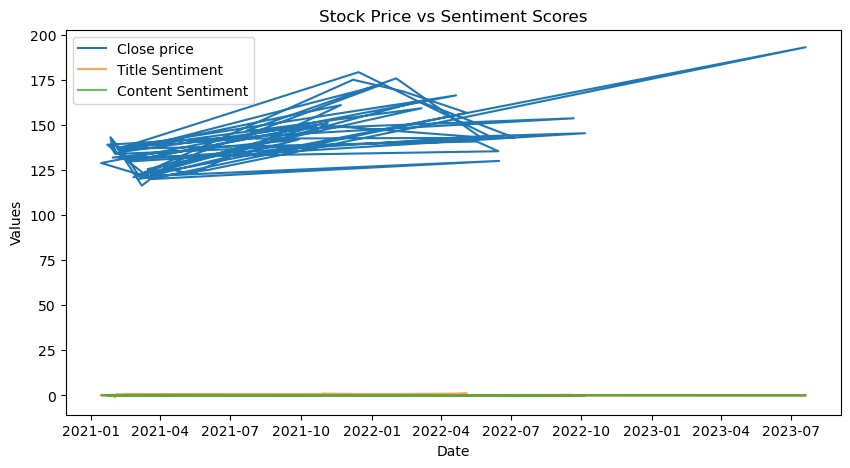

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(merged_data['date'], merged_data['close_price'], label='Close price')
plt.plot(merged_data['date'], merged_data['title_sentiment'], label='Title Sentiment', alpha=0.7)
plt.plot(merged_data['date'], merged_data['content_sentiment'], label='Content Sentiment', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Price vs Sentiment Scores')
plt.legend()
plt.show()

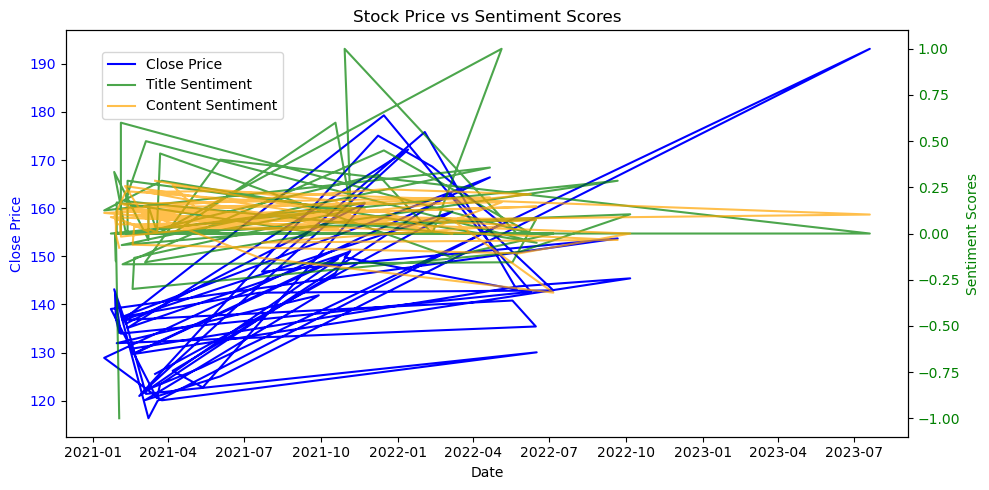

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(merged_data['date'], merged_data['close_price'], label='Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['title_sentiment'], label='Title Sentiment', color='green', alpha=0.7)
ax2.plot(merged_data['date'], merged_data['content_sentiment'], label='Content Sentiment', color='orange', alpha=0.7)
ax2.set_ylabel('Sentiment Scores', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Stock Price vs Sentiment Scores')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

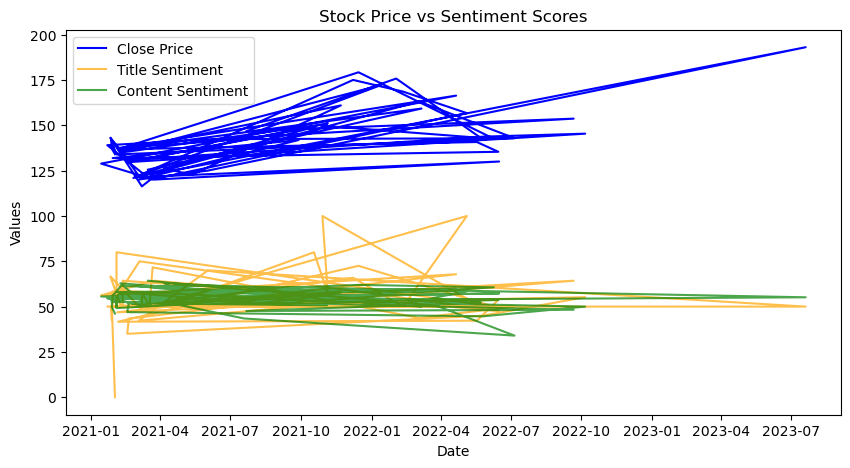

In [53]:
import matplotlib.pyplot as plt

# Normalize sentiment scores to the range of stock prices (0 to 100 for example)
merged_data['title_sentiment_normalized'] = (merged_data['title_sentiment'] + 1) * 50  # Normalize to 0-100
merged_data['content_sentiment_normalized'] = (merged_data['content_sentiment'] + 1) * 50  # Normalize to 0-100

plt.figure(figsize=(10, 5))

# Plot Close Price
plt.plot(merged_data['date'], merged_data['close_price'], label='Close Price', color='blue')

# Plot Sentiment Scores
plt.plot(merged_data['date'], merged_data['title_sentiment_normalized'], label='Title Sentiment', alpha=0.7, color='orange')
plt.plot(merged_data['date'], merged_data['content_sentiment_normalized'], label='Content Sentiment', alpha=0.7, color='green')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Price vs Sentiment Scores')
plt.legend()
plt.show()


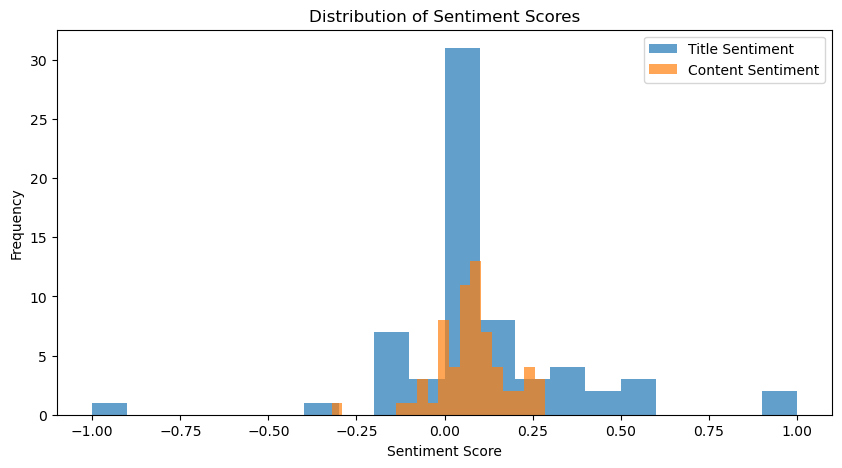

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(merged_data['title_sentiment'], bins=20, alpha=0.7, label='Title Sentiment')
plt.hist(merged_data['content_sentiment'], bins=20, alpha=0.7, label='Content Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.legend()
plt.show()

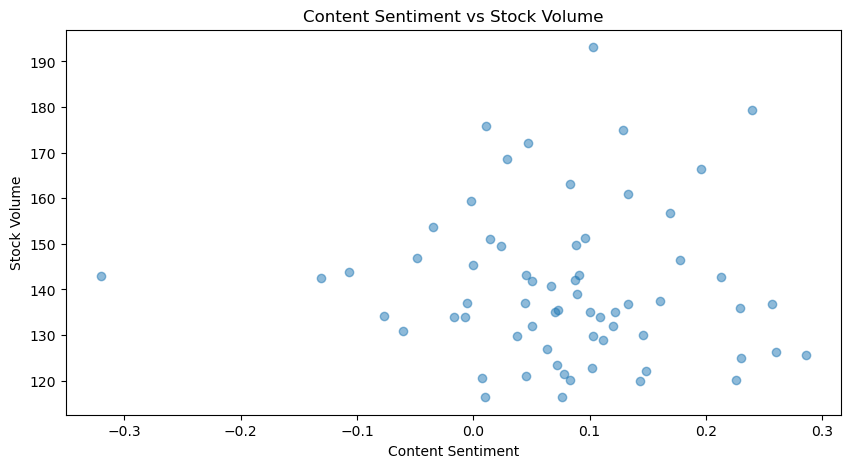

In [55]:
plt.figure(figsize=(10, 5))
plt.scatter(merged_data['content_sentiment'], merged_data['close_price'], alpha=0.5)
plt.xlabel('Content Sentiment')
plt.ylabel('Stock Volume')
plt.title('Content Sentiment vs Stock Volume')
plt.show()

In [56]:
merged_data['price_change'] = merged_data['close_price'].diff().shift(-1)
merged_data['price_direction'] = merged_data['price_change'].apply(lambda x: 1 if x > 0 else 0)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = merged_data[['title_sentiment', 'content_sentiment', 'close_price']]
target = merged_data['price_direction']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.50      1.00      0.67         4

    accuracy                           0.69        13
   macro avg       0.75      0.78      0.69        13
weighted avg       0.85      0.69      0.70        13



In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.67      1.00      0.80         4

    accuracy                           0.85        13
   macro avg       0.83      0.89      0.84        13
weighted avg       0.90      0.85      0.85        13



In [59]:
import pandas as pd
stock_data_cleaned = pd.read_csv('stocks_posts_cleaned.csv')
stock_data_cleaned.to_excel('stocks_posts_cleaned.xlsx', index=False, engine='openpyxl')
print("CSV file has been successfully converted to Excel.")

CSV file has been successfully converted to Excel.
